### Setup

In [10]:
import json
from tqdm import tqdm
from google_play_scraper import app, Sort, reviews

import urllib
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

In [2]:
# apps taken from the productivity category in google app store.
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [3]:
app_infos = []

for package in tqdm(app_packages):
    info = app(package, lang='en', country='us')
    app_infos.append(info)
    

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:04<00:00,  3.24it/s]


In [4]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    return json_str

In [5]:
print_json(app_infos[0])

'{\n  "adSupported": false,\n  "appId": "com.anydo",\n  "categories": [\n    {\n      "id": "PRODUCTIVITY",\n      "name": "Productivity"\n    }\n  ],\n  "comments": [],\n  "containsAds": false,\n  "contentRating": "Everyone",\n  "contentRatingDescription": null,\n  "currency": "USD",\n  "description": "\\ud83e\\udd47 <b>\\"#1 to do list app out there\\u201d</b> - WSJ\\r\\n\\ud83c\\udfc6 <b>Editor\'s Choice</b> by Google\\r\\n\\r\\nOver 40M people rely on Any.do to stay organized and get more done.\\r\\nIt\'s a simple to do list app with reminders, a planner & calendar - all in one.\\r\\n\\r\\n<b>\\ud83e\\udd47 \\"A MUST HAVE APP\\" (Lifehacker, NYTimes, USA TODAY).</b>\\r\\n\\r\\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\\r\\n\\r\\nOrganize your tasks & to-do list\\r\\n\\r\\n\\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and cal

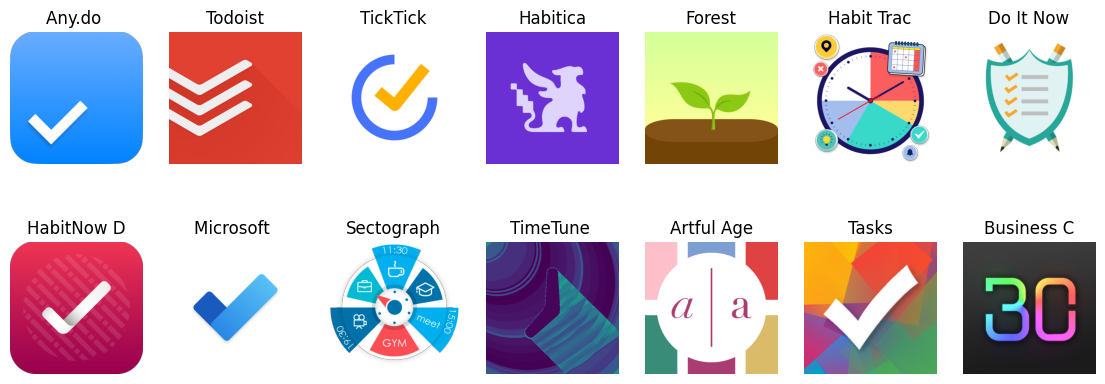

In [6]:
def format_title(title):
    sep_index = title.find(':')
    if sep_index == -1:
        sep_index = title.find('-')

    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    url = ai['icon']
    try:
        with urllib.request.urlopen(url) as response:
            img = Image.open(response)
            img = np.array(img)
            ax.imshow(img)
            title = format_title(ai['title'])
            ax.set_title(title)
            ax.axis('off')
    except Exception as e:
        print(f"Error loading image {url}: {e}")
        ax.axis('off')

In [8]:
app_info_df = pd.DataFrame(app_infos)
app_info_df.to_csv('apps.csv', index=None, header=True)

In [11]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap, lang='en', country='us', sort=sort_order,
                count=200 if score == 3 else 100,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 15/15 [01:02<00:00,  4.17s/it]


In [12]:
print(app_reviews[0])

{'reviewId': 'ca11e275-f9a7-4b0a-a4d1-f2981b568a46', 'userName': 'David Ottley', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIzXzsW6-X07cyqIdyT5GnufOZ8xxeGdQDVeHI-l6R7dzJ1sQ=mo', 'content': 'I have used this app for several years, and it has worked great for me. Within the last week, I have received several pop up ads to upgrade. This was in the middle of trying to edit my list of tasks. Very distracting. They are timed so that you cannot stop them until they finish playing. There was no notification on this change of behavior. I would no longer recommend this app', 'score': 1, 'thumbsUpCount': 7, 'reviewCreatedVersion': '5.18.0.2', 'at': datetime.datetime(2024, 6, 8, 11, 42, 11), 'replyContent': 'Please contact our team and we will help you regarding this under Settings-> Support.', 'repliedAt': datetime.datetime(2024, 6, 9, 2, 56, 26), 'appVersion': '5.18.0.2', 'sortOrder': 'most_relevant', 'appId': 'com.anydo'}


In [13]:
len(app_reviews)

17660

In [14]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)